# Analyse des données de Demandes de Valeurs Foncières (DVF)

## Importation des modules

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Préparation des données

In [2]:
url = 'https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20240408-125738/valeursfoncieres-2023.txt'
df = pd.read_csv(url, sep='|', low_memory=False).dropna(axis=1, how='all')
df

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,...,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,1,05/01/2023,Vente,"1070000,00",184.0,NaN,ALL,0124,DES HETRES,1630.0,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
1,1,05/01/2023,Vente,"1070000,00",159.0,NaN,ALL,0124,DES HETRES,1630.0,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
2,1,05/01/2023,Vente,"1070000,00",159.0,NaN,ALL,0124,DES HETRES,1630.0,...,NaN,NaN,1,2.0,Appartement,233.0,8.0,NaN,NaN,NaN
3,1,03/01/2023,Vente,"152200,00",2914.0,NaN,RTE,0107,DE PONCIN,1450.0,...,NaN,NaN,0,1.0,Maison,64.0,3.0,S,NaN,988.0
4,1,05/01/2023,Vente,"269000,00",427.0,T,CHE,0040,DE L'AUBEPIN,1800.0,...,NaN,NaN,0,1.0,Maison,73.0,3.0,S,NaN,835.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727000,1,05/10/2023,Adjudication,"3931000,00",39.0,NaN,AV,1832,CHARLES FLOQUET,75007.0,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
3727001,1,05/10/2023,Adjudication,"3931000,00",39.0,NaN,AV,1832,CHARLES FLOQUET,75007.0,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
3727002,1,05/10/2023,Adjudication,"3931000,00",39.0,NaN,AV,1832,CHARLES FLOQUET,75007.0,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
3727003,1,28/12/2023,Vente,"98250,00",66.0,B,RUE,8892,SEBASTIEN MERCIER,75015.0,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN


In [3]:
# On prend le département des Cotes d'Armor
df1 = df[df['Code departement'] == '75']

Dates = pd.to_datetime(df['Date mutation'], dayfirst=True)

df1_cleaned = df1.drop(['B/T/Q', 'Voie', 'Code voie', 'Commune', 'No Volume', '1er lot', 'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot', '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot', 'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot', 'Nombre de lots', 'Type local', 'No disposition', 'Date mutation'], axis=1)
df1_cleaned.isnull().sum()

Nature mutation                  0
Valeur fonciere                563
No voie                        205
Type de voie                   241
Code postal                    202
Code departement                 0
Code commune                     0
Prefixe de section           80420
Section                          0
No plan                          0
Code type local                804
Surface reelle bati            811
Nombre pieces principales      811
Nature culture               73224
Nature culture speciale      80420
Surface terrain              73224
dtype: int64

In [4]:
df1_cleaned

,Nature mutation,Valeur fonciere,No voie,Type de voie,Code postal,Code departement,Code commune,Prefixe de section,Section,No plan,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
3646585,Vente,"1825000,00",89.0,RUE,75001.0,75,101,NaN,AP,50,4.0,165.0,0.0,NaN,NaN,NaN
3646586,Vente,"567000,00",51.0,RUE,75010.0,75,110,NaN,AV,75,4.0,52.0,0.0,NaN,NaN,NaN
3646587,Vente,"140000,00",178.0,RUE,75017.0,75,117,NaN,BG,53,2.0,18.0,1.0,NaN,NaN,NaN
3646588,Vente,"400000,00",12.0,RUE,75009.0,75,109,NaN,BD,36,2.0,43.0,1.0,NaN,NaN,NaN
3646589,Vente,"141343,12",63.0,RUE,75018.0,75,118,NaN,AK,14,3.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727000,Adjudication,"3931000,00",39.0,AV,75007.0,75,107,NaN,BU,4,3.0,0.0,0.0,NaN,NaN,NaN
3727001,Adjudication,"3931000,00",39.0,AV,75007.0,75,107,NaN,BU,4,3.0,0.0,0.0,NaN,NaN,NaN
3727002,Adjudication,"3931000,00",39.0,AV,75007.0,75,107,NaN,BU,4,3.0,0.0,0.0,NaN,NaN,NaN
3727003,Vente,"98250,00",66.0,RUE,75015.0,75,115,NaN,FV,100,3.0,0.0,0.0,NaN,NaN,NaN


### Numérisation des données

## Numérisation des données

In [5]:
df1_cleaned['Valeur fonciere'] = df1_cleaned['Valeur fonciere'].str.replace(',', '.').astype(float)


df1_cleaned['Type de voie'] = df1_cleaned['Type de voie'].astype("category").cat.codes
df1_cleaned['Nature mutation'] = df1_cleaned["Nature mutation"].astype("category").cat.codes
df1_cleaned['Nature culture'] = df1_cleaned["Nature culture"].astype("category").cat.codes

df1_cleaned['Nature culture speciale'] = df1_cleaned["Nature culture speciale"].fillna("0").astype("category").cat.codes
df1_cleaned['Nature culture speciale'] = df1_cleaned["Nature culture speciale"].astype("category").cat.codes

df1_cleaned['Section'] = df1_cleaned['Section'].astype("category").cat.codes
df1_cleaned['Code type local'] = df1_cleaned['Code type local'].astype("category").cat.codes
df1_cleaned['No voie'] = df1_cleaned['No voie'].astype("category").cat.codes

df1_cleaned.loc[df1_cleaned['Code departement'] == '2A', 'Code departement'] = 200
df1_cleaned.loc[df1_cleaned['Code departement'] == '2B', 'Code departement'] = 201
df1_cleaned['Code departement'] = df1_cleaned['Code departement'].astype(int)

df1_cleaned['Prefixe de section'] = df1_cleaned['Prefixe de section'].fillna(0).astype(int)

df1_cleaned['Surface Totale'] = df1_cleaned['Surface reelle bati'] + df1_cleaned['Surface terrain']


```python
df1_cleaned['Prefixe de section'] = df["Prefixe de section"].fillna(0)
df1_cleaned['reference_cadastral'] = (
    df1_cleaned['Code departement'].apply(lambda x: str(x).zfill(3)) + " " +
    # df1_cleaned['Code commune'].apply(lambda x: str(x).zfill(3)) + " " + 
    df1_cleaned['Prefixe de section'].apply(lambda x: str(int(x)).zfill(3)) + " " +
    df1_cleaned['Section'].apply(lambda x : str(x).ljust(2, "0")) + " " )
    # df['No plan'].apply(lambda x: str(x).zfill(3)))
```

In [6]:
df1_cleaned

,Nature mutation,Valeur fonciere,No voie,Type de voie,Code postal,Code departement,Code commune,Prefixe de section,Section,No plan,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Surface Totale
3646585,3,1825000.00,88,17,75001.0,75,101,0,15,50,3,165.0,0.0,-1,0,NaN,NaN
3646586,3,567000.00,50,17,75010.0,75,110,0,21,75,3,52.0,0.0,-1,0,NaN,NaN
3646587,3,140000.00,177,17,75017.0,75,117,0,32,53,1,18.0,1.0,-1,0,NaN,NaN
3646588,3,400000.00,11,17,75009.0,75,109,0,29,36,1,43.0,1.0,-1,0,NaN,NaN
3646589,3,141343.12,62,17,75018.0,75,118,0,10,14,2,0.0,0.0,-1,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727000,0,3931000.00,38,1,75007.0,75,107,0,46,4,2,0.0,0.0,-1,0,NaN,NaN
3727001,0,3931000.00,38,1,75007.0,75,107,0,46,4,2,0.0,0.0,-1,0,NaN,NaN
3727002,0,3931000.00,38,1,75007.0,75,107,0,46,4,2,0.0,0.0,-1,0,NaN,NaN
3727003,3,98250.00,65,17,75015.0,75,115,0,150,100,2,0.0,0.0,-1,0,NaN,NaN


In [7]:
df1_cleaned.isnull().sum()

Nature mutation                  0
Valeur fonciere                563
No voie                          0
Type de voie                     0
Code postal                    202
Code departement                 0
Code commune                     0
Prefixe de section               0
Section                          0
No plan                          0
Code type local                  0
Surface reelle bati            811
Nombre pieces principales      811
Nature culture                   0
Nature culture speciale          0
Surface terrain              73224
Surface Totale               73289
dtype: int64

In [8]:
df1_cleaned = df1_cleaned.dropna()
df1_cleaned.isnull().sum()

Nature mutation              0
Valeur fonciere              0
No voie                      0
Type de voie                 0
Code postal                  0
Code departement             0
Code commune                 0
Prefixe de section           0
Section                      0
No plan                      0
Code type local              0
Surface reelle bati          0
Nombre pieces principales    0
Nature culture               0
Nature culture speciale      0
Surface terrain              0
Surface Totale               0
dtype: int64

In [9]:
df1_cleaned = df1_cleaned.drop_duplicates()
df1_cleaned

,Nature mutation,Valeur fonciere,No voie,Type de voie,Code postal,Code departement,Code commune,Prefixe de section,Section,No plan,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Surface Totale
3646723,3,430000.0,117,17,75019.0,75,119,0,85,124,0,18.0,1.0,3,0,28.0,46.0
3646805,4,762000000.0,11,17,75001.0,75,101,0,24,26,3,150.0,0.0,3,0,454.0,604.0
3646806,4,762000000.0,11,17,75001.0,75,101,0,24,26,3,203.0,0.0,3,0,454.0,657.0
3646807,4,762000000.0,11,17,75001.0,75,101,0,24,26,3,16.0,0.0,3,0,454.0,470.0
3646808,4,762000000.0,11,17,75001.0,75,101,0,24,26,3,84.0,0.0,3,0,454.0,538.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726948,3,47000000.0,2,17,75006.0,75,106,0,33,95,3,239.0,0.0,3,0,625.0,864.0
3726949,3,47000000.0,2,17,75006.0,75,106,0,33,95,1,239.0,8.0,3,0,625.0,864.0
3726950,3,47000000.0,2,17,75006.0,75,106,0,33,95,1,39.0,3.0,3,0,625.0,664.0
3726951,3,47000000.0,2,17,75006.0,75,106,0,33,95,1,154.0,5.0,3,0,625.0,779.0


In [10]:
# TODO : trouver un groupby adapté

## Visualisation des données

### Matrice de corrélation

In [11]:
# Matrice de corrélation
correlation_matrix = df1_cleaned.corr()
correlation_matrix

,Nature mutation,Valeur fonciere,No voie,Type de voie,Code postal,Code departement,Code commune,Prefixe de section,Section,No plan,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Surface Totale
Nature mutation,1.000000,0.666789,-0.036183,0.016126,-0.128306,NaN,-0.128306,NaN,-0.044210,-0.069732,0.039405,0.045131,-0.025555,0.001316,NaN,0.070351,0.081012
Valeur fonciere,0.666789,1.000000,-0.074779,0.044773,-0.283908,NaN,-0.283908,NaN,-0.079021,-0.114886,0.132792,0.091546,-0.055620,-0.001280,NaN,0.129053,0.153328
No voie,-0.036183,-0.074779,1.000000,-0.174050,0.111645,NaN,0.111645,NaN,0.100848,-0.032976,-0.004391,-0.007312,-0.027144,0.004967,NaN,0.108515,0.083505
Type de voie,0.016126,0.044773,-0.174050,1.000000,-0.026270,NaN,-0.026270,NaN,0.048822,0.015078,-0.040667,-0.072379,-0.017181,0.049734,NaN,0.000853,-0.038317
Code postal,-0.128306,-0.283908,0.111645,-0.026270,1.000000,NaN,1.000000,NaN,0.555645,0.084688,-0.245970,-0.007797,0.174219,-0.017161,NaN,0.102646,0.078514
Code departement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Code commune,-0.128306,-0.283908,0.111645,-0.026270,1.000000,NaN,1.000000,NaN,0.555645,0.084688,-0.245970,-0.007797,0.174219,-0.017161,NaN,0.102646,0.078514
Prefixe de section,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Section,-0.044210,-0.079021,0.100848,0.048822,0.555645,NaN,0.555645,NaN,1.000000,0.116333,-0.216163,0.013973,0.182266,-0.060619,NaN,0.195664,0.165202
No plan,-0.069732,-0.114886,-0.032976,0.015078,0.084688,NaN,0.084688,NaN,0.116333,1.000000,-0.140294,-0.037724,0.092214,0.016643,NaN,-0.106004,-0.105751


In [12]:
correlation_matrix.isnull().sum()

Nature mutation               3
Valeur fonciere               3
No voie                       3
Type de voie                  3
Code postal                   3
Code departement             17
Code commune                  3
Prefixe de section           17
Section                       3
No plan                       3
Code type local               3
Surface reelle bati           3
Nombre pieces principales     3
Nature culture                3
Nature culture speciale      17
Surface terrain               3
Surface Totale                3
dtype: int64

C:\Users\kevmu\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


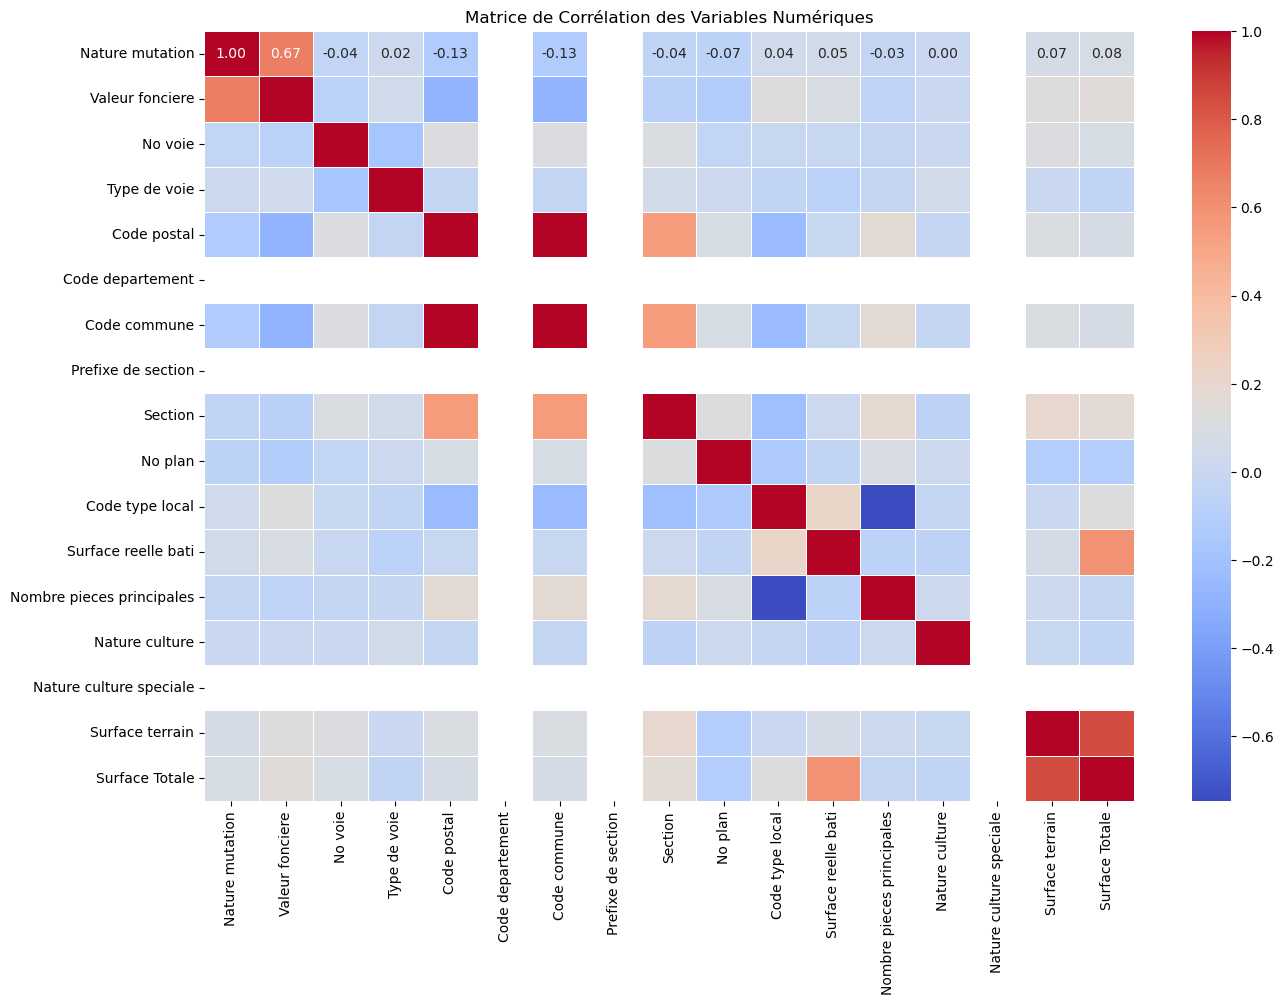

In [13]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation des Variables Numériques')
plt.show()

### Valeur foncière VS Surface Totale

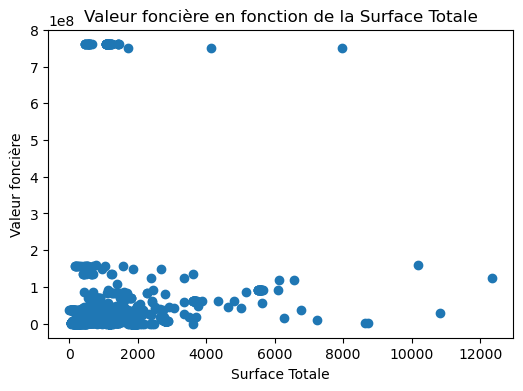

In [14]:
plt.figure(figsize=(6, 4))
plt.scatter(df1_cleaned['Surface Totale'], df1_cleaned['Valeur fonciere'])
plt.xlabel('Surface Totale')
plt.ylabel('Valeur foncière')
plt.title('Valeur foncière en fonction de la Surface Totale')
plt.show()

# TODO : Ajouter une régression linéaire

### Code département VS Valeur foncière

On utilise la moyenne de la valeur foncière pour chaque code département. Cela permet d'annuler l'effet des vlaleurs extrêmes.

In [15]:
df1_cleaned['Code postal']

3646723    75019.0
3646805    75001.0
3646806    75001.0
3646807    75001.0
3646808    75001.0
            ...   
3726948    75006.0
3726949    75006.0
3726950    75006.0
3726951    75006.0
3726952    75006.0
Name: Code postal, Length: 2491, dtype: float64

In [16]:
means_valeur_fonciere = df1_cleaned.groupby('Code postal')['Valeur fonciere'].mean()

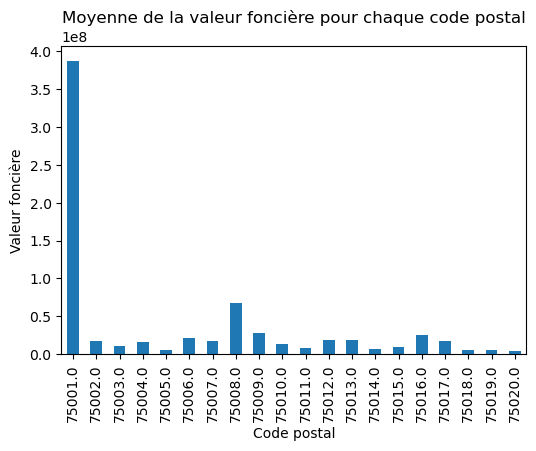

In [17]:
# Moyenen de la valeur foncière pour chaque arrondissement de Paris
plt.figure(figsize=(6, 4))
means_valeur_fonciere.plot(kind='bar')
plt.xlabel('Code postal')
plt.ylabel('Valeur foncière')
plt.title('Moyenne de la valeur foncière pour chaque code postal')
plt.show()

On observe des une valeur foncière moyenne annormalement élevé pour le 1er arrondissement de Paris. Cela est dû à des valeurs extrêmes. On va donc supprimer ces valeurs extrêmes pour mieux visualiser.

In [18]:
# Suppression des valeurs extrêmes
df1_cleaned_without_extrem = df1_cleaned[df1_cleaned['Valeur fonciere'] < 700000000]
means_valeur_fonciere_without_extrem = df1_cleaned_without_extrem.groupby('Code postal')['Valeur fonciere'].mean()
means_valeur_fonciere_without_extrem

Code postal
75001.0    1.321077e+07
75002.0    1.709790e+07
75003.0    1.126930e+07
75004.0    1.627094e+07
75005.0    5.737424e+06
75006.0    2.096031e+07
75007.0    1.736222e+07
75008.0    5.506807e+07
75009.0    2.833720e+07
75010.0    1.318777e+07
75011.0    7.595483e+06
75012.0    1.911754e+07
75013.0    1.870470e+07
75014.0    6.112568e+06
75015.0    9.863297e+06
75016.0    2.465509e+07
75017.0    1.694468e+07
75018.0    4.864303e+06
75019.0    4.857773e+06
75020.0    3.910545e+06
Name: Valeur fonciere, dtype: float64

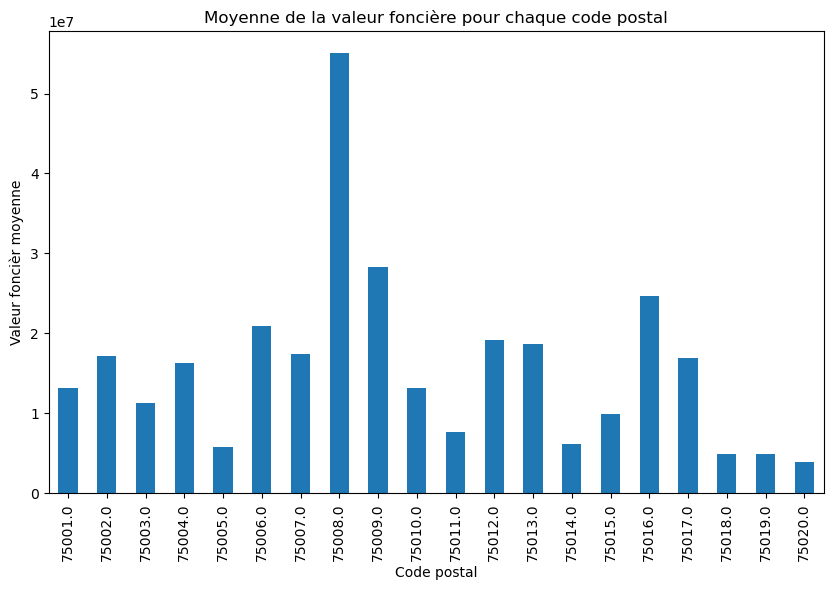

In [19]:
plt.figure(figsize=(10, 6))
means_valeur_fonciere_without_extrem.plot(kind='bar')
plt.xlabel('Code postal')
plt.ylabel('Valeur foncièr moyenne')
plt.title('Moyenne de la valeur foncière pour chaque code postal')
plt.show()

### Pairplot

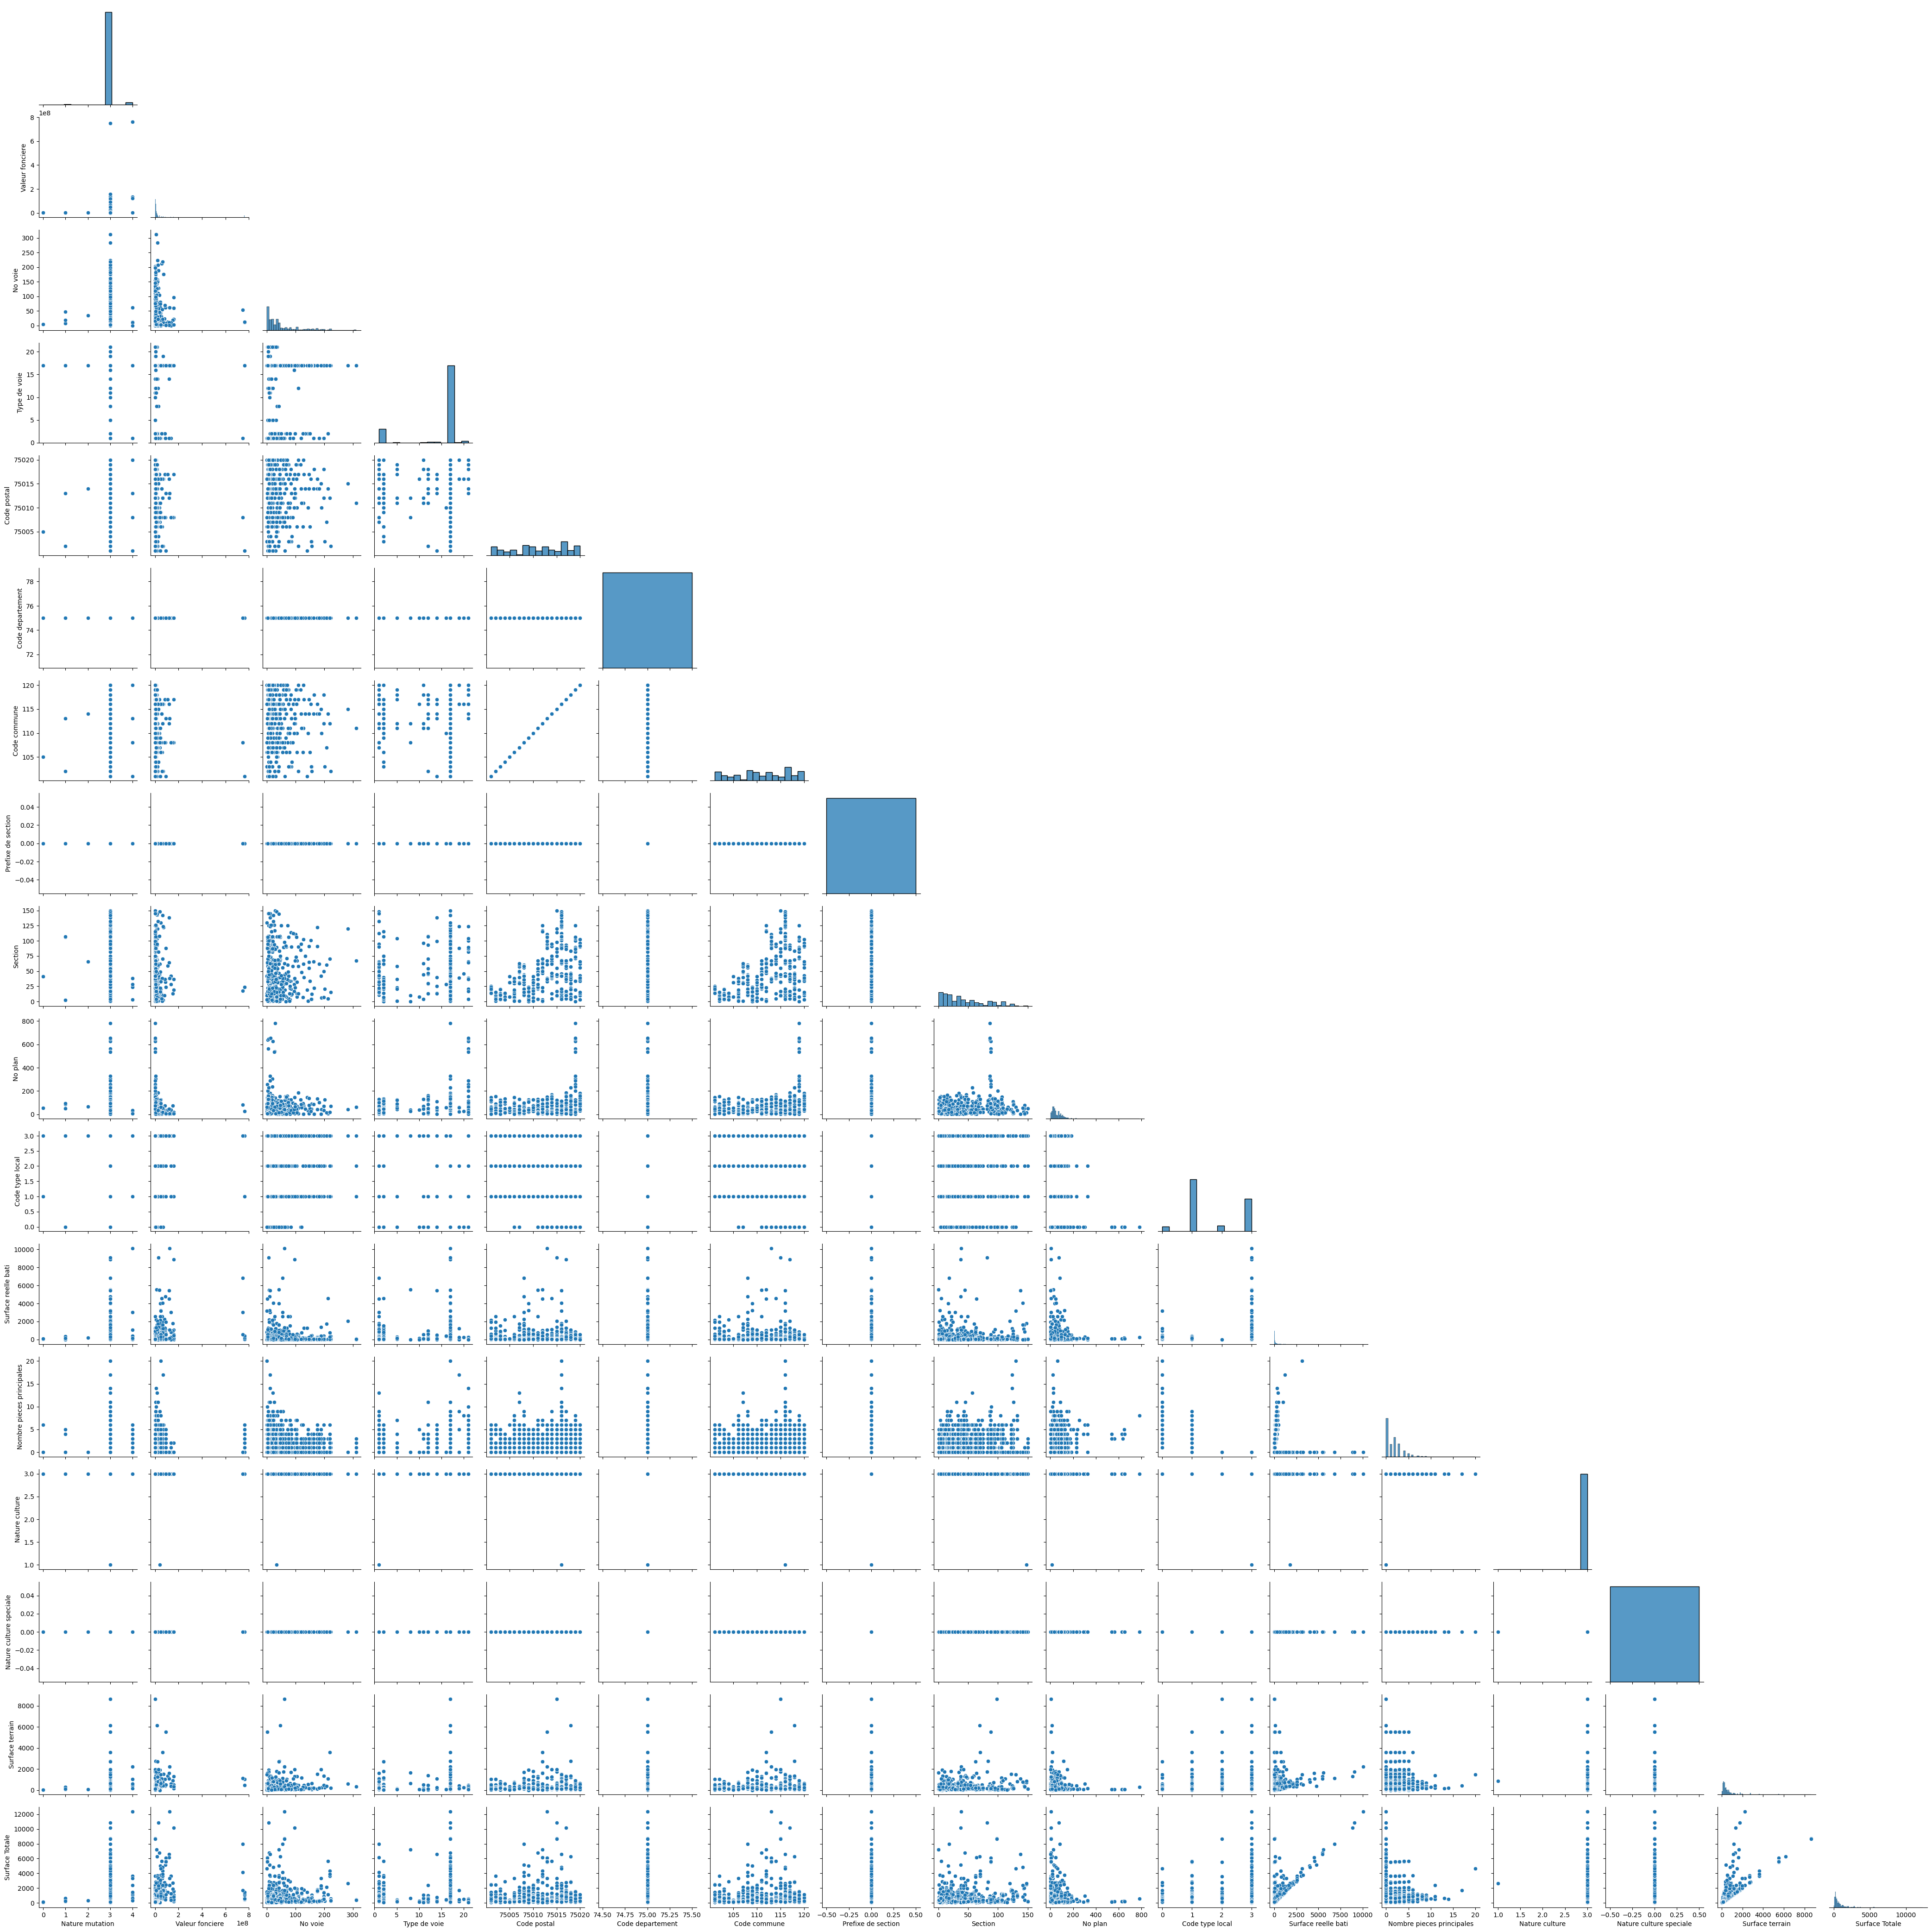

In [20]:
pairplot = sns.pairplot(df1_cleaned, corner=True)
plt.show(pairplot)

## [Géomap](https://towardsdatascience.com/how-safe-are-the-streets-of-santiago-e01ba483ce4b) des valeurs foncières

### Import des modules

In [21]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import geoplot as gplt

In [22]:
means_valeur_fonciere_without_extrem # on garde la moyenne par département réalisé précédemment

Code postal
75001.0    1.321077e+07
75002.0    1.709790e+07
75003.0    1.126930e+07
75004.0    1.627094e+07
75005.0    5.737424e+06
75006.0    2.096031e+07
75007.0    1.736222e+07
75008.0    5.506807e+07
75009.0    2.833720e+07
75010.0    1.318777e+07
75011.0    7.595483e+06
75012.0    1.911754e+07
75013.0    1.870470e+07
75014.0    6.112568e+06
75015.0    9.863297e+06
75016.0    2.465509e+07
75017.0    1.694468e+07
75018.0    4.864303e+06
75019.0    4.857773e+06
75020.0    3.910545e+06
Name: Valeur fonciere, dtype: float64

1. On convertit en DataFrame tout en gardant uniquement le numéro de l'arrondissement pour faciliter le merge des prochain dataframe

In [23]:
means_valeur_fonciere_without_extrem_df = pd.DataFrame(list(means_valeur_fonciere_without_extrem.items()), columns=['Code postal', 'Valeur fonciere'])
means_valeur_fonciere_without_extrem_df['Code postal'] = means_valeur_fonciere_without_extrem_df['Code postal'].astype(int)
means_valeur_fonciere_without_extrem_df['Code postal'] = means_valeur_fonciere_without_extrem_df['Code postal'].astype(str).str[-2:].astype(int).astype(object)
means_valeur_fonciere_without_extrem_df = means_valeur_fonciere_without_extrem_df.rename(columns={"Valeur fonciere" : 'valeur_fonciere'})
means_valeur_fonciere_without_extrem_df


,Code postal,valeur_fonciere
0,1,1.321077e+07
1,2,1.709790e+07
2,3,1.126930e+07
3,4,1.627094e+07
4,5,5.737424e+06
5,6,2.096031e+07
6,7,1.736222e+07
7,8,5.506807e+07
8,9,2.833720e+07
9,10,1.318777e+07


2. Les données géographiques vont être récupérées avec un fichier geojson et ensuite stockées dans un DataFrame

In [24]:
# On récupère  les données géographiques des arrondissements de Paris
#path = './map_Paris/arrondissements.shp'

#paris = gpd.read_file(path, encoding='utf-8')
#paris_shape = paris.to_crs('EPSG:4326')

file_path = 'arrondissements.geojson'
paris_shape = gpd.read_file(file_path)

3. Verification de la bonne importation du fichier

In [25]:
paris_shape.head()

,n_sq_ar,c_ar,c_arinsee,l_ar,l_aroff,n_sq_co,surface,perimetre,geom_x_y,geometry
0,750000007,7,75107,7ème Ardt,Palais-Bourbon,750001537,4.090057e+06,8099.424883,"{'lon': 2.3121876953655494, 'lat': 48.85617443...","POLYGON ((2.30088 48.85118, 2.29932 48.85217, ..."
1,750000017,17,75117,17ème Ardt,Batignolles-Monceau,750001537,5.668835e+06,10775.579516,"{'lon': 2.3067769905744084, 'lat': 48.88732652...","POLYGON ((2.29517 48.87396, 2.29504 48.87378, ..."
2,750000001,1,75101,1er Ardt,Louvre,750001537,1.824613e+06,6054.936862,"{'lon': 2.3364433620533878, 'lat': 48.86256270...","POLYGON ((2.32801 48.86992, 2.32997 48.86851, ..."
3,750000003,3,75103,3ème Ardt,Temple,750001537,1.170883e+06,4519.263648,"{'lon': 2.360000985897692, 'lat': 48.862872380...","POLYGON ((2.36383 48.86750, 2.36389 48.86747, ..."
4,750000014,14,75114,14ème Ardt,Observatoire,750001537,5.614877e+06,10317.483310,"{'lon': 2.3265420441989466, 'lat': 48.82924450...","POLYGON ((2.33381 48.84061, 2.33673 48.83965, ..."


4. Numérisation de l'arrondissement 

In [26]:
paris_shape['c_ar'] = paris_shape['c_ar'].astype(int)
paris_shape = paris_shape.sort_values(by='c_ar')

5. On merge le dataframe paris_shape avec means_valeur_fonciere_without_extrem_df

In [27]:
paris_shape = paris_shape.merge(means_valeur_fonciere_without_extrem_df, left_on='c_ar', right_on='Code postal', how='left')
paris_shape.head()

,n_sq_ar,c_ar,c_arinsee,l_ar,l_aroff,n_sq_co,surface,perimetre,geom_x_y,geometry,Code postal,valeur_fonciere
0,750000001,1,75101,1er Ardt,Louvre,750001537,1.824613e+06,6054.936862,"{'lon': 2.3364433620533878, 'lat': 48.86256270...","POLYGON ((2.32801 48.86992, 2.32997 48.86851, ...",1,1.321077e+07
1,750000002,2,75102,2ème Ardt,Bourse,750001537,9.911537e+05,4554.104360,"{'lon': 2.3428025468913636, 'lat': 48.86827922...","POLYGON ((2.35152 48.86443, 2.35095 48.86341, ...",2,1.709790e+07
2,750000003,3,75103,3ème Ardt,Temple,750001537,1.170883e+06,4519.263648,"{'lon': 2.360000985897692, 'lat': 48.862872380...","POLYGON ((2.36383 48.86750, 2.36389 48.86747, ...",3,1.126930e+07
3,750000004,4,75104,4ème Ardt,Hôtel-de-Ville,750001537,1.600586e+06,5420.908434,"{'lon': 2.357629620324997, 'lat': 48.854341426...","POLYGON ((2.36851 48.85573, 2.36900 48.85374, ...",4,1.627094e+07
4,750000005,5,75105,5ème Ardt,Panthéon,750001537,2.539375e+06,6239.195396,"{'lon': 2.3507146095752587, 'lat': 48.84444315...","POLYGON ((2.36443 48.84614, 2.36484 48.84584, ...",5,5.737424e+06


6. On drop ensuite la feature code postal car elle est identique à c_ar

In [28]:
paris_shape = paris_shape.drop(columns=['Code postal'])

7. Pour avoir une bonne échelle, on divise par 1 million puis on convertit en float pour rentre les données exploitables

In [29]:
paris_shape['valeur_fonciere'] = paris_shape['valeur_fonciere']/ 1000000

In [30]:
paris_shape['valeur_fonciere'] = paris_shape['valeur_fonciere'].apply(lambda x: '{:.2f}'.format(x))
paris_shape['valeur_fonciere'] = paris_shape['valeur_fonciere'].astype(float)

8. On trie les variables dans l'ordre croissant des arrondissements

In [31]:
paris_shape = paris_shape.sort_values(by='c_ar')
paris_shape.head()

,n_sq_ar,c_ar,c_arinsee,l_ar,l_aroff,n_sq_co,surface,perimetre,geom_x_y,geometry,valeur_fonciere
0,750000001,1,75101,1er Ardt,Louvre,750001537,1.824613e+06,6054.936862,"{'lon': 2.3364433620533878, 'lat': 48.86256270...","POLYGON ((2.32801 48.86992, 2.32997 48.86851, ...",13.21
1,750000002,2,75102,2ème Ardt,Bourse,750001537,9.911537e+05,4554.104360,"{'lon': 2.3428025468913636, 'lat': 48.86827922...","POLYGON ((2.35152 48.86443, 2.35095 48.86341, ...",17.10
2,750000003,3,75103,3ème Ardt,Temple,750001537,1.170883e+06,4519.263648,"{'lon': 2.360000985897692, 'lat': 48.862872380...","POLYGON ((2.36383 48.86750, 2.36389 48.86747, ...",11.27
3,750000004,4,75104,4ème Ardt,Hôtel-de-Ville,750001537,1.600586e+06,5420.908434,"{'lon': 2.357629620324997, 'lat': 48.854341426...","POLYGON ((2.36851 48.85573, 2.36900 48.85374, ...",16.27
4,750000005,5,75105,5ème Ardt,Panthéon,750001537,2.539375e+06,6239.195396,"{'lon': 2.3507146095752587, 'lat': 48.84444315...","POLYGON ((2.36443 48.84614, 2.36484 48.84584, ...",5.74


9. On affiche chaque arrondissement de paris selon sa valeur foncière moyenne

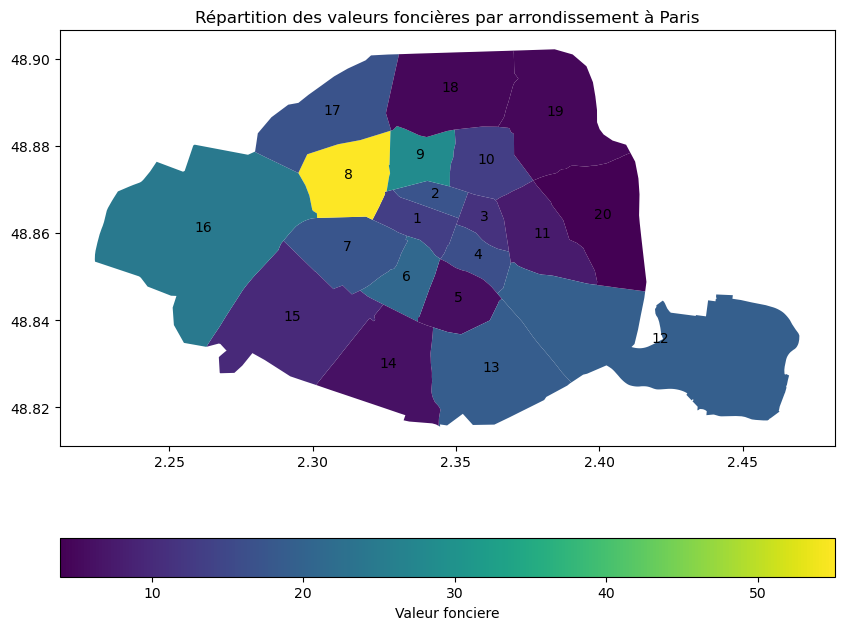

In [32]:
fig, ax= plt.subplots(figsize=(10, 8))
paris_shape.plot(column='valeur_fonciere', cmap='viridis',legend=True, ax=ax, legend_kwds={'label': 'Valeur fonciere', "orientation": 'horizontal'})

for idx, row in paris_shape.iterrows():
    plt.annotate(text=row['c_ar'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), ha='center')

plt.title('Répartition des valeurs foncières par arrondissement à Paris')
plt.show()

## PCA

1. Import des module

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

2. Standardisation des données

In [34]:
scaler = StandardScaler()
scaler.fit(df1_cleaned)
df1_cleaned_scaled = scaler.transform(df1_cleaned)

3. PCA

In [94]:
pca = PCA(n_components=0.95)
pca.fit(df1_cleaned_scaled)
pca_x = pca.transform(df1_cleaned_scaled)

4. Visualisation

### Pairplot de tous les PCAs

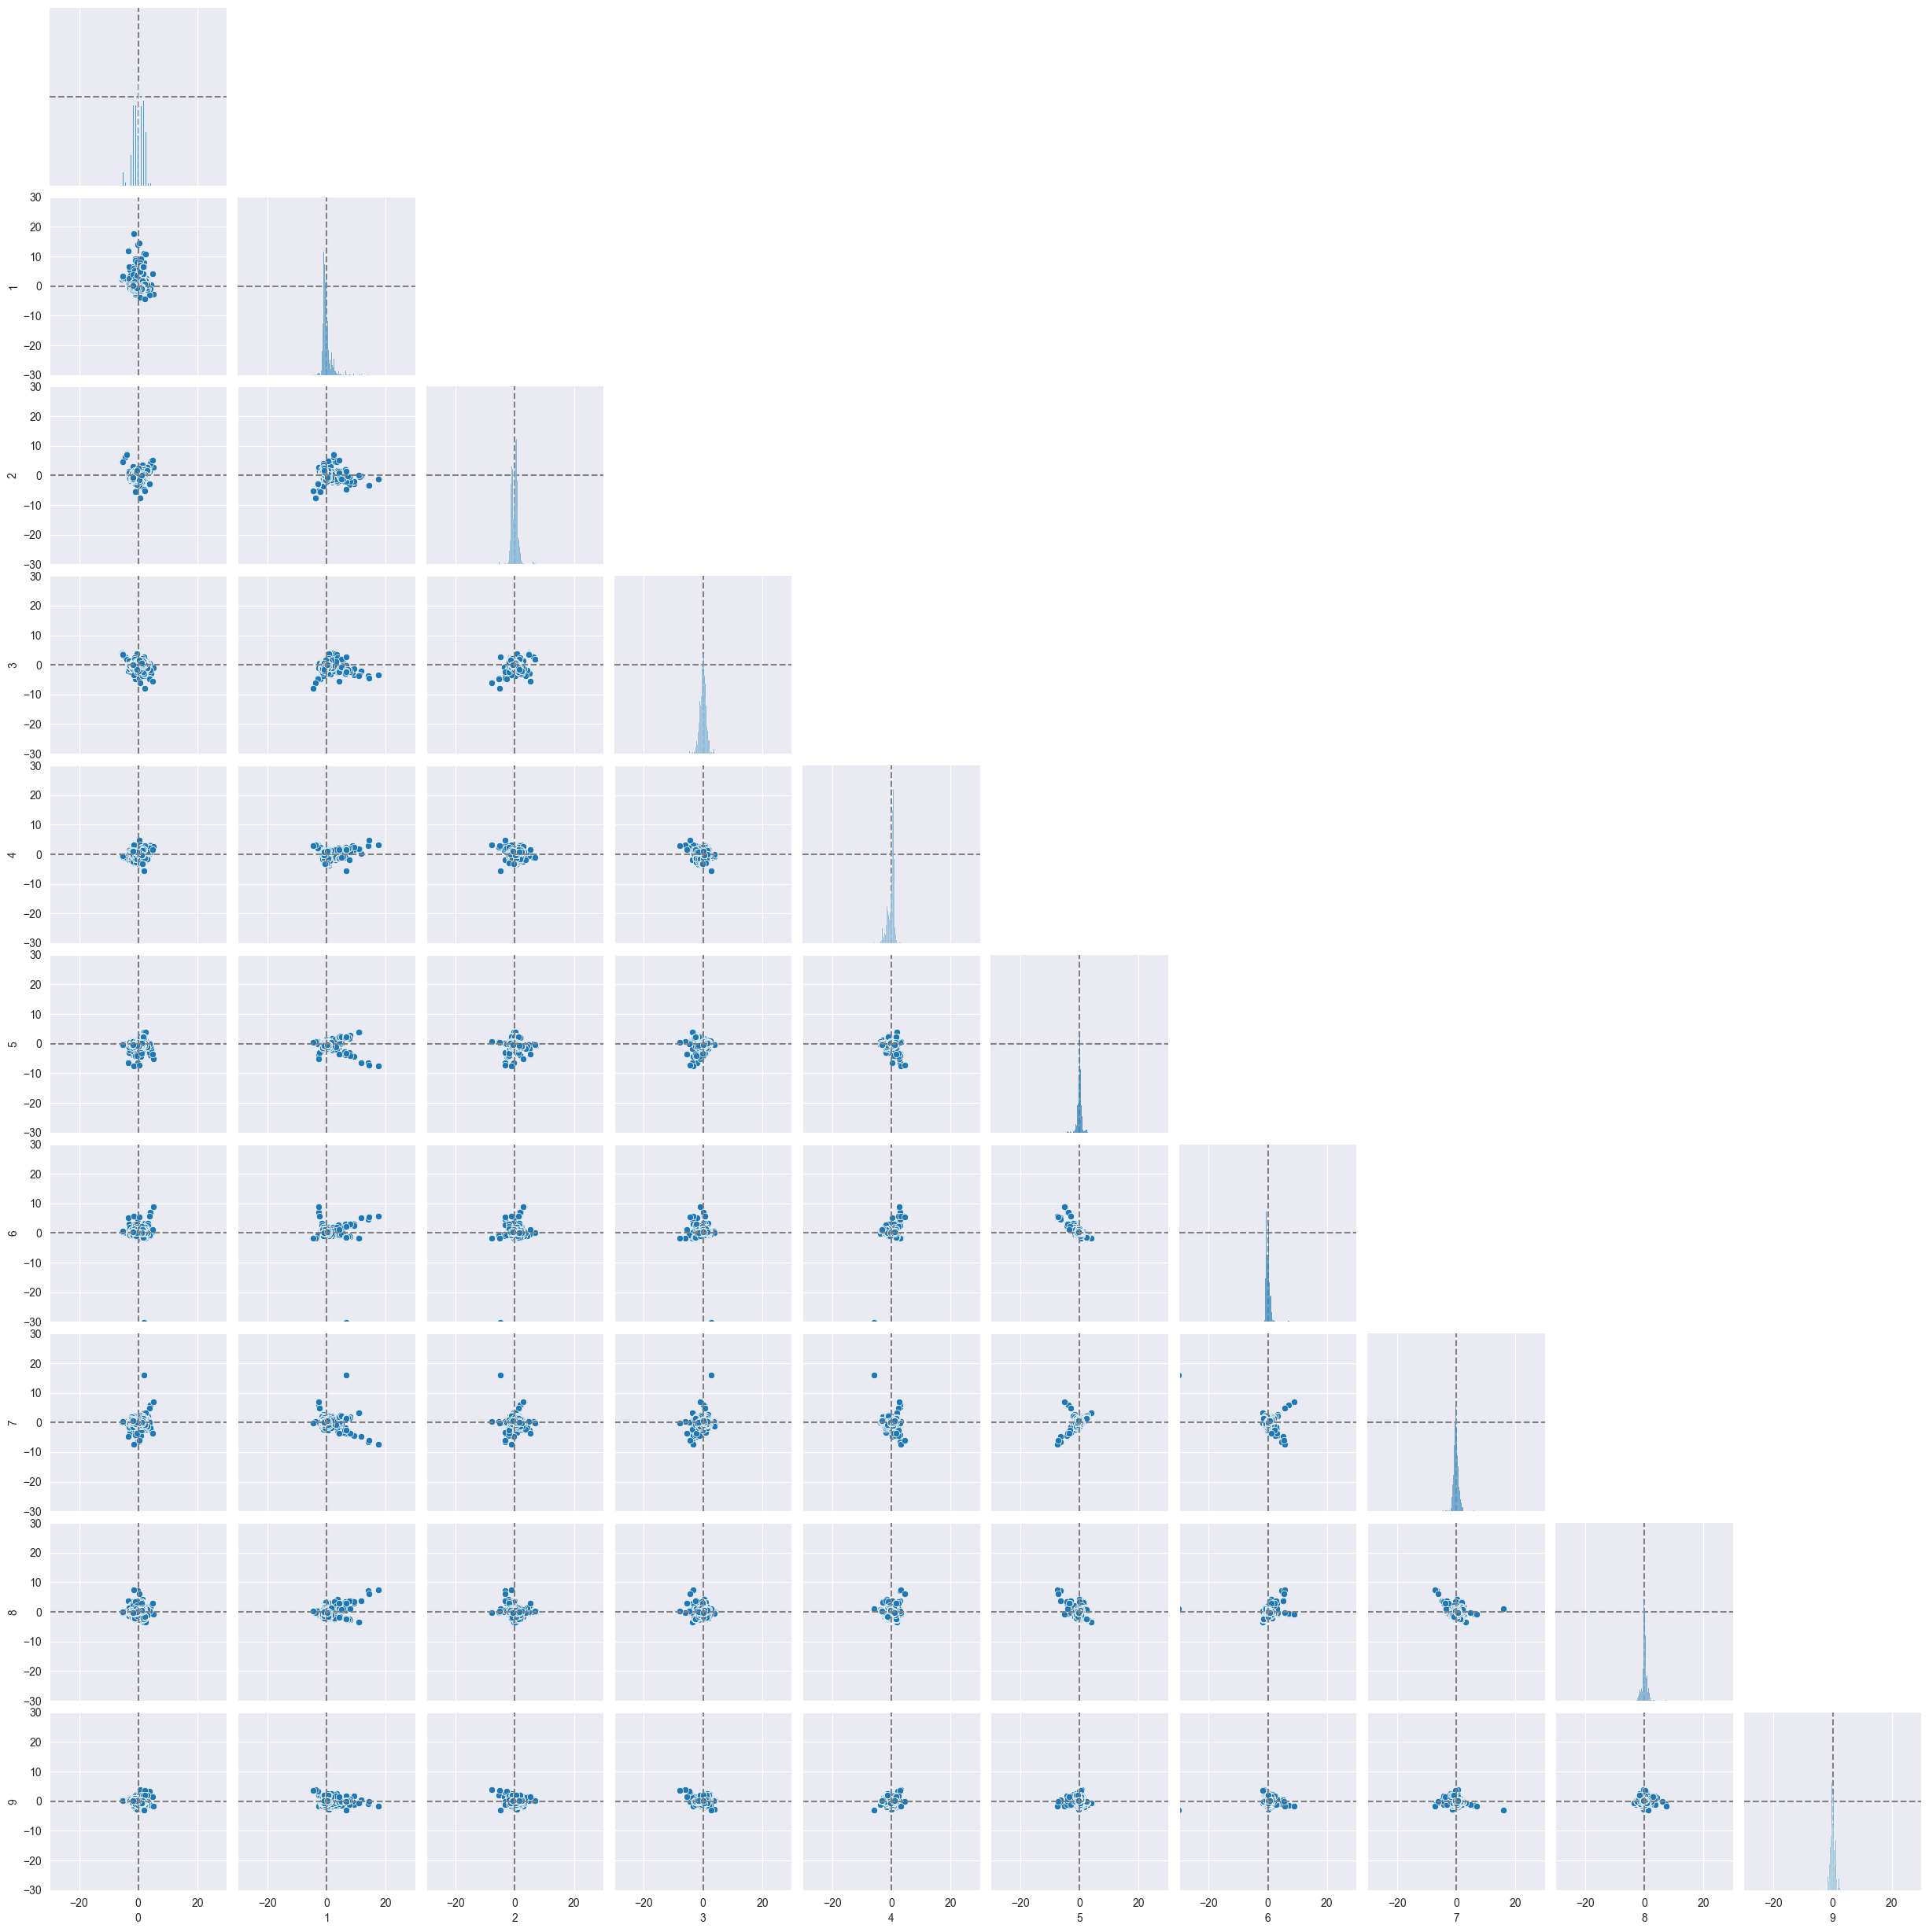

In [95]:
pca_x_df = pd.DataFrame(pca_x)
pairplot = sns.pairplot(pca_x_df, corner=True)
for ax in pairplot.axes.flatten():
    if ax is not None: 
        ax.set_xlim(-30, 30) 
        ax.set_ylim(-30, 30)  
        ax.axhline(0, color='gray', linestyle='--')  
        ax.axvline(0, color='gray', linestyle='--') 
plt.show(pairplot)

Text(0, 0.5, 'PC2')

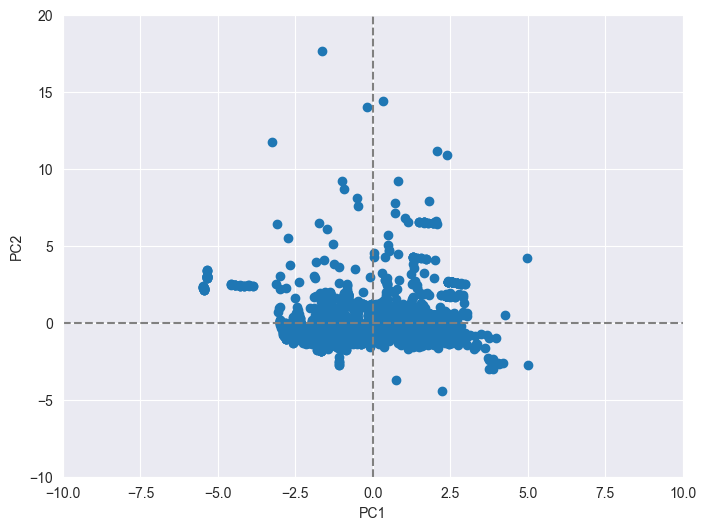

In [103]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_x[:, 0], pca_x[:, 1])
plt.xlim(-10, 10)
plt.ylim(-10, 20)
plt.axhline(0, color='gray', linestyle='--')  
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Modèl ML

## Apprentissage non supervisé - KMeans

### Import des modules

In [104]:
from sklearn.cluster import KMeans

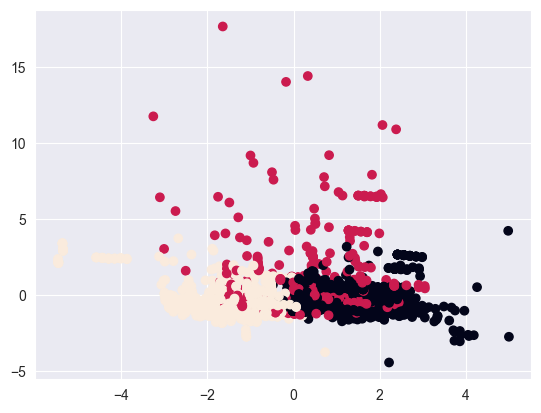

In [105]:
model = KMeans(3, random_state=223)

model.fit(pca_x)
pred_label = model.predict(pca_x)

plt.scatter(pca_x[:,0],pca_x[:,1], c=pred_label)

In [ ]:
# TODO : Interpréter les clusters

## Apprentissage supervié